Проведемо аналіз на даних компанії Yulu за допомогою візуалізацій.

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [3]:
#завантажуємо дані та виводимо перші 5 рядків
df = pd.read_csv('../data/yulu_rental.csv') 
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Питання №1: Яка залежність між неформальними користувачами та місяцем.

In [28]:
#перетворюємо колонку datetime на тип даних pd.datetime
df['datetime']  = pd.to_datetime(df.datetime) 

In [32]:
#створюємо нову колонку з місяцем
df['month'] = df.datetime.dt.month

In [33]:
df_filt = df.groupby('month')['casual'].sum()  

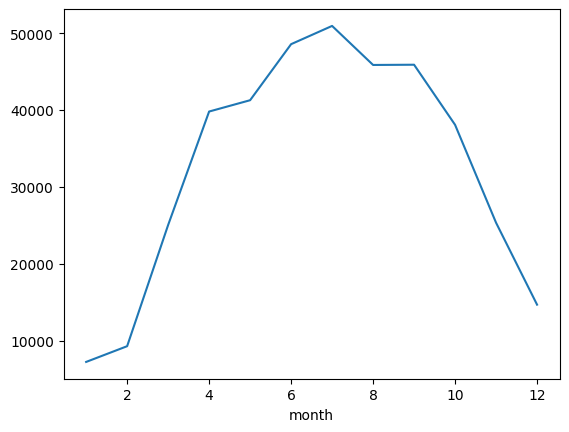

In [34]:
df_filt.plot();

Більшість неформальних користувачів беруть велосипеди з квітня по вересень, та починаючи з жовтня кількість неформальних користувачів падає і взимку є найнижчою.

Питання №2: Чи впливає наявність вітру на користування велосипедами. Перевіримо це через побудову залежності між швидкістю вітру та кількістю арендованих велосипедів.

In [59]:
#змінюємо тип даних колонки на ціле число для зручності
df['windspeed'] = df['windspeed'].astype(int)

In [54]:
wind_filt = df.groupby('windspeed')['count'].sum()

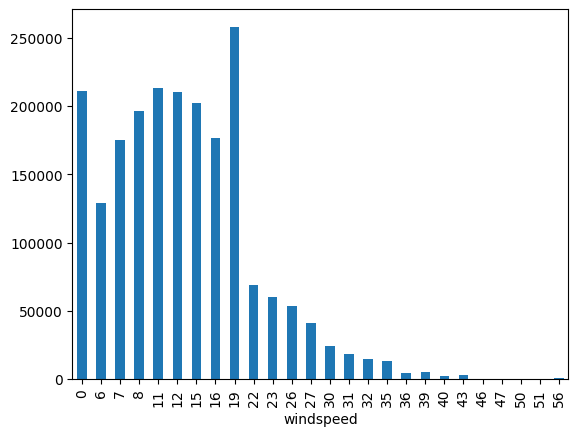

In [60]:
wind_filt.plot.bar();             

Можемо сказати,що коли швидкість вітру починає бути більше значення 19,то кількість орендованих велосипедів зменшується, що є логічним(чим сильніше вітер - тим складніше їхати на велосипеді). Також можна зазначити що основна кількість велосипедів була у користуванні при швидкості вітру від 0 до 19, піки спостерігаємо на значеннях 0 та 19.Можна припустити,що така швидкість вітру якраз є влітку(коли більшість часу тепло і немає вітру) та ранньої осені або середина весни (коли зазвичає є легкий вітерець).

Питання № 3: Перевіримо чи є періоди протягом року,коли неформальних користувачів більше за зареєстрованих.Побудуємо графік,який показуватиме кількість неформальних та зареєстрованих користувачів за сезонами.

In [75]:
df_season = df[['registered','casual', 'season']].groupby('season').sum()

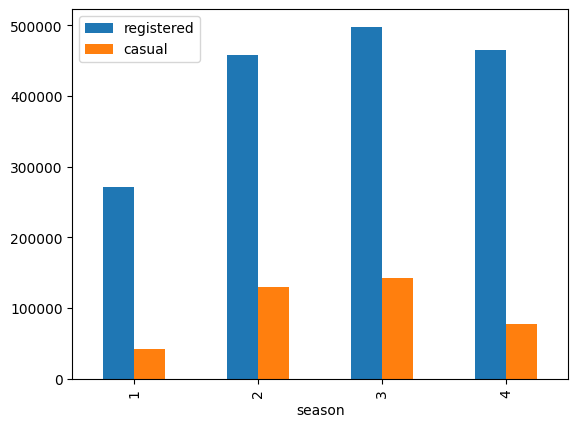

In [77]:
df_season.plot.bar();

Навіть у найпопулярніші сезони  - літо та перша половина осені - зареєстровані клієнти майже втричі більше ніж неформальні клієнти арендують велосипеди.Але навіть така частка неформальних клієнтів досить велика по відношенню до зареєстрованих,отже треба ще продовжувати  шукати причину чому люди не хочуть реєструватися та намагатися знизити цей показник.

Висновок: згідно усіх трьох графіків зрозуміло,що чим холодніше та гірше погода,тим менше люди користуються велосипедами,тому 